In [4]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [14]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

voting_clf = VotingClassifier(estimators=[
    ('lr', LogisticRegression(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('svc', SVC(random_state=42))
])

voting_clf.fit(X,y)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [15]:
for name, clf in voting_clf.named_estimators_.items():
    print(f'{name} = {clf.score(X_test,y_test)}')

lr = 0.848
rf = 1.0
svc = 0.912


random forest is overfitted if added more testing data it would surely fail

In [16]:
voting_clf.predict(X_test[:1])

array([1], dtype=int64)

In [17]:
[clf.predict(X_test[:1]) for clf in voting_clf.estimators_]

[array([1], dtype=int64), array([1], dtype=int64), array([0], dtype=int64)]

In [18]:
voting_clf.score(X_test, y_test)

0.944

In [19]:
voting_clf.voting = 'soft'
voting_clf.named_estimators["svc"].probability = True
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.92

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_jobs=-1, n_estimators=500, max_samples=100, random_state=42)

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

In [22]:
bag_clf.score(X_test, y_test)

0.904

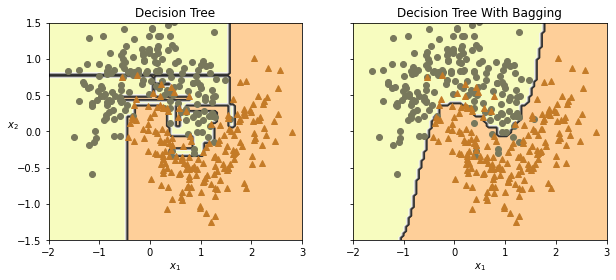

In [75]:
import matplotlib.pyplot as plt
import numpy as np

def decision_boundary(clf, X, y, alpha=1.0):
    axes = [-2, 3, -1.5, 1.5]
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                        np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    plt.contourf(x1, x2, y_pred, alpha=0.4 * alpha, cmap='Wistia')
    plt.contour(x1, x2, y_pred, alpha=0.9 * alpha, cmap='Greys')
    colors = ["#78785c", "#c47b27"]
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
decision_boundary(tree_clf, X_train, y_train)
plt.title("Decision Tree")
plt.sca(axes[1])
decision_boundary(voting_clf, X_train, y_train)
plt.title("Decision Tree With Bagging")
plt.ylabel("")
plt.show()

In [53]:
x1, x2 = np.meshgrid(np.linspace(-2, 2, 100),
                        np.linspace(-2, 2, 100))
X_new = np.c_[x1.ravel(), x2.ravel()]
print(X_new.shape)
y_pred = voting_clf.predict(X_new)
y_pred = y_pred.reshape(x1.shape)
y_pred

(10000, 2)


array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 1, 1]], dtype=int64)